<a href="https://colab.research.google.com/github/miottto/Data-Science-Portfolio/blob/main/Data_Exploration_on_Berlin_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://github.com/miottto/Data-Science-Portfolio/blob/main/Data%20Exploration%20on%20Berlin%20Airbnb/berlinbanner.png?raw=true">

# Data Exploration on Berlin Airbnb

##**About Berlin**

**Berlin** is a popular tourist destination with over **5 million tourist arrivals** in 2021, including **3.85 million international visitors**.  The city has a population of over **3.6 million** and offers **794** travel accommodation establishments (hotels and hostels) for visitors to choose from.
Berlin has a rich history and cultural heritage, making it a popular tourist destination. Some of the main tourist attractions include the Berlin Wall Memorial and the Brandenburg Gate.

## **About Airbnb**

The [Airbnb](https://www.airbnb.com/) is an Internet marketplace for short-term rental of houses and apartments. It connects people interested in offering hosting services through their homes or rooms to other people interested in an alternative hosting service. 


## **Objective**

The goal of this study is to explore the raw data  in order to draw a profile of the Airbnb service available in Berlin based on it's main attributes.

By the end we expect to get some insights and obtain a better understanding about the relevance of Airbnb for the city of Berlin

## **The dataset**

The Airbnb does not disclose their data publicly. But [Inside Airbnb](http://insideairbnb.com/get-the-data.html),  is a mission driven activist project that provides Airbnb data obtained through [web scraping](https://en.wikipedia.org/wiki/Web_scraping), and advocates for the protection of residential communities.

<center><img alt="Inside Airbnb", width="20%", src='https://pbs.twimg.com/profile_images/575532099827986432/uiwyE4c1_400x400.png'></center>



<br />

### **Obtaining Data**


First, let's import the necessary libraries and import the dataset from Inside Airbnb

In [ ]:
# import the necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#configuring visualization
%matplotlib inline

In [ ]:
# import the listings.csv file into a DataFrame
df = pd.read_csv('http://data.insideairbnb.com/germany/be/berlin/2022-12-21/visualisations/listings.csv')


###**The Dataset Attributes**



The "listings.csv" dataset contains all Berlin's Airbnb listed rooms and they are sorted by a series of attributes. This dictionary indicates what each of them means:

**Variables Dictionary**

* `id` - Airbnb's unique identifier for the listing
* `name` - name of the listing
* `host_id` - Airbnb's unique identifier for the host/user
* `host_name` - name of the host. Usually just the first name(s)
* `neighbourhood_group` - the neighbourhood group as geocoded
* `neighbourhood` - the neighbourhood as geocoded
* `latitude` - the World Geodetic System projection for latitude
* `longitude` - the World Geodetic System projection for longitude
* `room_type` - entire place, private room or shared room
* `price` - daily price in local currency
* `minimum_nights` - minimum number of night stay for the listing
* `number_of_reviews` - the number of reviews the listing has
* `last_review` - the date of the last review
* `reviews_per_month` - The number of reviews the listing has over the lifetime of the listing
* `number_of_reviews_ltm`- The number of reviews the listing has (in the last 12 months)
* `calculated_host_listings_count` - the number of listings the host has
* `availabilty_365` - number of days of availability within 365 days
* `license` - the license number

<br />

###**1. Data Analysis**

From now on, we are going to evaluate the dataset both **quantitatively** and **qualitatively**. What's the size of it? What types of data we have? Are there any missing values? What about outliers? We will dive into these questions.

Let's start having a glance at the dataset, checking the first **5** entries.

In [ ]:
# check the first 5 entries of the data frame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.89,1,280,0,First name and Last name: Nicolas Krotz Conta...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,93,26,2021-06-21,0.17,4,139,0,NaN
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90,93,48,2017-12-14,0.31,2,143,0,NaN
4,57049,130 sqm with a view on Mauer Park,54283,Marine,Pankow,Prenzlauer Berg Nordwest,52.54758,13.40632,Entire home/apt,280,3,114,2022-10-23,0.78,3,134,15,03/Z/RA/003544-18


And the last **5** entries

In [ ]:
# check the last 5 entries of the data frame
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15712,782613303872754480,Apartment in Prenzlauer Berg,168342678,Vanessa,Pankow,Prenzlauer Berg Süd,52.535704,13.433303,Entire home/apt,45,92,0,NaN,NaN,1,215,0,NaN
15713,782624035738508837,High ceiling room in Berlin Schöneberg,480052472,Sascha,Tempelhof - Schöneberg,Friedenau,52.478550,13.348510,Private room,31,30,0,NaN,NaN,2,302,0,Legal entity name and Legal form: Urban HPT Gm...
15714,782634843891762466,Luxury room in Berlin Friedrichshain!,480052472,Sascha,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.509360,13.451140,Private room,31,30,0,NaN,NaN,2,364,0,Legal entity name and Legal form: Urban HPT Gm...
15715,782661043309280379,"Bright flat,+ instruments",139683620,Nelly,Treptow - Köpenick,Alt Treptow,52.490359,13.448729,Private room,52,5,0,NaN,NaN,1,305,0,First name and Last name: Nelly Amler Contact...
15716,782767880255769915,Spacious Studio in Schöneberg,463282497,Kayo,Tempelhof - Schöneberg,Schöneberg-Süd,52.488510,13.347550,Entire home/apt,71,2,0,NaN,NaN,3,13,0,08/Z/RA/009058-20


### **1.1- Dataset shape and variable types**

How many attributes and entries does our dataset have? What are the types of variables?

- Attributes = variables (columns)

- Entries = airbnb listings (lines)

In [ ]:
# identifying the shape of the dataset
print("Attributes:\t{}".format(df.shape[1]))
print("Entries:\t{}".format(df.shape[0]))
print('\n')

# show variable types:
df.dtypes

Attributes:	18
Entries:	15717




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

We have a dataset with **15717** listings described by **18** unique attributes. The datatypes seem suitable for further analysis. Let's move on.

### **1.2- Missing Values**

Sometimes raw data is accompanied by missing values ​​(Nan or Null) that can impact the analysis. It is necessary to be aware of them.

What is the percentage of missing values in the dataset per attribute?

In [ ]:
# sort the variables in descending order by their missing values
(df.isna().sum() / df.shape[0]*100).sort_values(ascending=False)

license                           59.400649
reviews_per_month                 18.845836
last_review                       18.845836
host_name                          0.127251
name                               0.114526
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

The large number of missing values for the **"license"** attribute draws attention. According to the law, specific rentals require a license. A percentage of **59.4%** of the listings are missing data about license. How many listings are unlicensed, falsely claiming exemptions, and how many does Airbnb continue to advertise and profit from?

In order to protect housing there are some **obligations for hosts** offering non-residential properties and addresses home-sharing in Berlin. The rules are **less restrictive for long-term rentals** (minimum nights > 90 days). In specific cases hosts have to **obtain a permit** from their district office and then enter the registration number in their Airbnb listing.

Ok, let's leave this aside for now and continue treating the dataset

#### **Removing missing values**

Time get rid of the noise by removing missing values and variables variables considered irrelevant for this work.

In [ ]:
# deleting columns with missing data
df.drop(columns=['reviews_per_month', 'last_review', 'license'], inplace=True)

# deleting entries with missing data
df.dropna(axis=0, inplace=True)


####**Checking the results**

Once the cleaning is done, it is time to check if it worked well.

In [ ]:
#checking the cleaning results
(df.isna().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

And now we have a dataset without missing values to work with.

### **2 - Variables Distribution Type**

What's the variables distribution type? Let's see our numeric data graphically exposed by using **histograms** as a convenient way to introduce data dispersion visualization and get more awareness about the data.

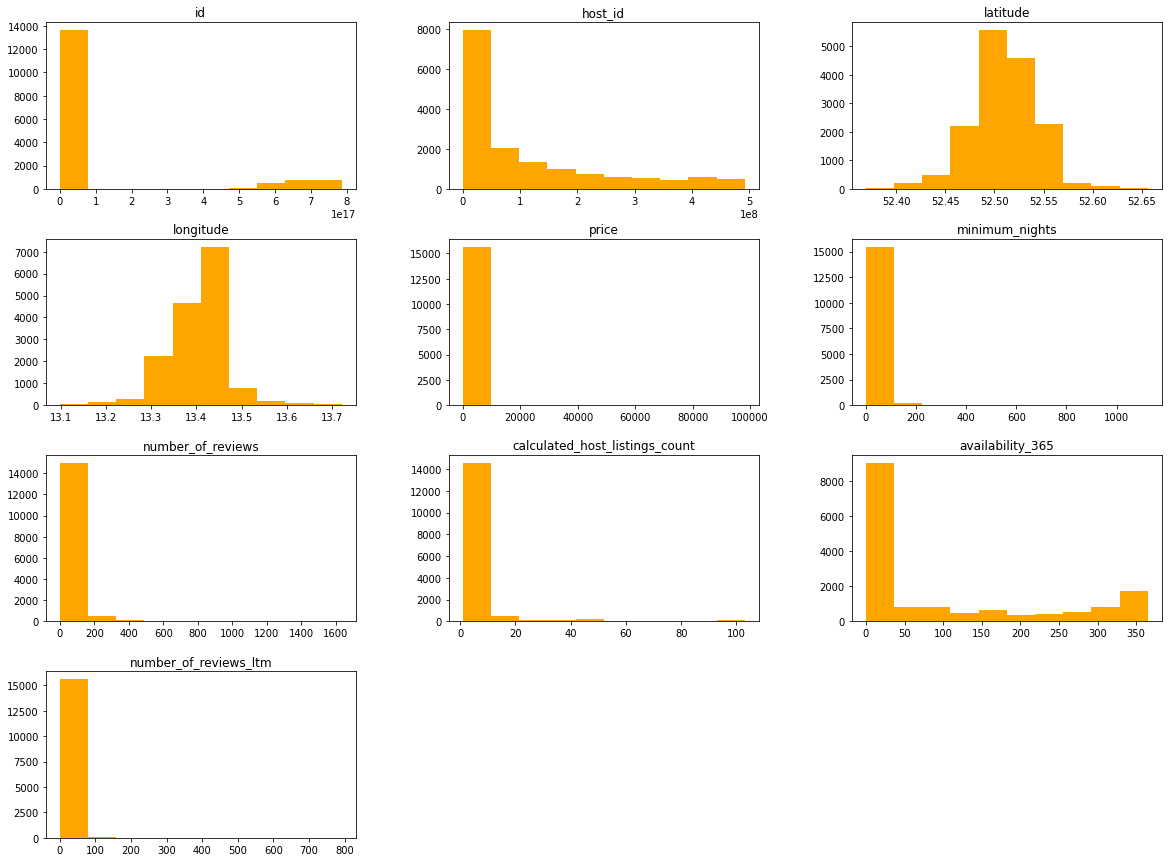

In [ ]:
# plot the histogram of the numeric variables 
df.hist(figsize=(20,15), grid=(False), color='orange');

The representation above shows some **skewed** histograms.

Take the **`price`** histogram for example. It shows a large price range but only one large left aligned bar showing that the vast majority of the datapoints are in that region. The other price regions are extremely underrepresented indicating the presence of outliers.

**Outliers** are data points in a dataset that are considered to be extreme, false, or not representative of what the data is describing. These outliers can be caused by either incorrect data collection or genuine outlying observations.


### **3 - Outliers** 

Identify, analyze, removal and results

### **3.1 - Identify** 

In order to identify outliers we are going to use the Interquartile Range statistical concept. 

The **Interquartile Range (IQR)** is a measure of variability, based on dividing a dataset into quartiles. The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of a data set, and it represents the middle 50% of the data points. This metric is useful in identifying outliers and skewness in a dataset.


<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>


**Acessing a table that describes the statistical dispersion of our variables in the original dataset:**

In [ ]:
# check the statistical dispersion
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.567900e+04,15679.0,15679.0,15679.0,15679.0,15679.0,15679.0,15679.0,15679.0,15679.0
mean,8.917599e+16,111232542.6,52.5,13.4,103.4,13.9,29.3,4.3,95.8,7.3
std,2.306592e+17,132475966.6,0.0,0.1,947.2,41.7,66.2,11.8,130.7,18.9
min,3.176000e+03,1581.0,52.4,13.1,0.0,1.0,0.0,1.0,0.0,0.0
25%,1.386958e+07,12800691.0,52.5,13.4,40.0,2.0,1.0,1.0,0.0,0.0
50%,2.786424e+07,47884220.0,52.5,13.4,68.0,3.0,6.0,1.0,4.0,0.0
75%,4.444919e+07,169874842.5,52.5,13.4,106.0,5.0,24.0,2.0,184.0,6.0
max,7.861719e+17,492038056.0,52.7,13.7,98108.0,1124.0,1635.0,103.0,365.0,792.0


The table above shows the variables with their statistically dispersed data considering the IQR quartiles. We can observe that:

* The **`price`** variable has a minimum of 0.
* The **`price`** variable has a **Q3** of **106** for a night, but its maximum value is 98108 .
* The **`minimum_nights`** variable has a **Q3** of **5 nights**, but its maximum value is 1124 nights.
* The **`calculated_host_listings_count`** variable has a **Q3** of **2 listings**, but its maximum value is 103 listings.

It's clear that **it has the presence of outliers** and now we are aware of the numbers. 

The variables `number_of_reviews`,  `availability_365`, `number_of_reviews_ltm` and `calculated_host_listings_count` may also contain outliers, but we are not considering get rid of them by now.

The number of reviews and availability topics are not that relevant for this work, while `calculated_host_listings_count` outliers may have considerable importance.

### **3.2 - Analyze**

Now that we have identified the presence of outliers, let's prepare the ground for removing them.

**In this analysis we will:**

- Work just on `price` and `minimum_nights` variables

- Define the outlier limits for the variables using the proposed IQR model.

- Use boxplots to help us visualize the quantification and distribution of the outliers.


Defining outliers limits for **`price`**

In [ ]:
#identifying the outliers for the price variable
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR of the price variable:', IQR_price)

#defining the outlier limits
upper_price = q3_price + (1.5 * IQR_price)
lower_price = q1_price - (1.5 * IQR_price)
print('The upper limit is', upper_price)
print('The lower limit is', lower_price)


IQR of the price variable: 66.0
The upper limit is 205.0
The lower limit is -59.0


The "lower limit" negative value shows that something is incorrect. Although we have no outliers at this level, we still have **values equal to zero** in this variable that need to be removed.

 Boxplot for **`price`** 

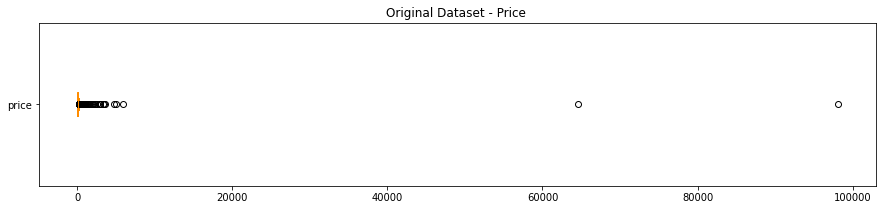

The dataset contains 15679 entries
There are 992 entries above 205
It represents 6.33% of the dataset


In [ ]:
#defining a boxplot for price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False, color='darkorange')
ax.set_title('Original Dataset - Price ')
plt.show()

#exposing quantitative information about outliers
print('The dataset contains {} entries'.format(df.shape[0]))
print('There are {} entries above 205'.format(len(df[df.price > 205])))
print('It represents {:.2f}% of the dataset'.format(len(df[df.price > 205]) / df.shape[0] * 100))

Defining outliers for **`minimum_nights`**

In [ ]:
#identifying the outliers for the minimum_nights variable
q1_min = df.minimum_nights.quantile(.25)
q3_min = df.minimum_nights.quantile(.75)
IQR_min = q3_min - q1_min
print('IQR of minimum_nights variable:', IQR_min)

#defining the outlier limits
upper_min = q3_min + 1.5 * IQR_min
lower_min = q1_min - 1.5 * IQR_min
print('The upper limit is', upper_min)
print('The lower limit is',lower_min)

IQR of minimum_nights variable: 3.0
The upper limit is 9.5
The lower limit is -2.5


In this case the "lower limit" negative value just indicates that some listings do not require a minimum night stay and so are represented with the value 0.

 Boxplot for **`minimum_nights`**

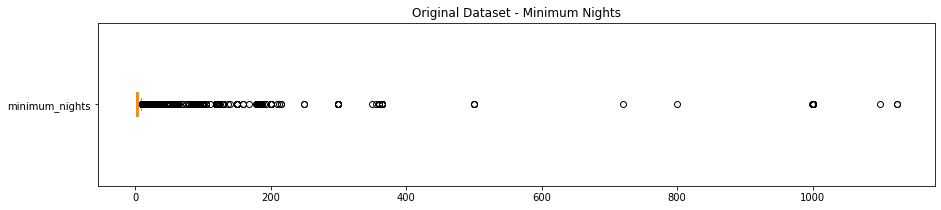

The dataset contains 15679 entries
There are 2695 entries above 9.5
It represents 17.19% of the dataset


In [ ]:
#defining a boxplot for minimum_nights
fig, ax= plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False, color='darkorange')
ax.set_title('Original Dataset - Minimum Nights')
plt.show()

##exposing quantitative information about outliers 
print('The dataset contains {} entries'.format(df.shape[0]))
print('There are {} entries above 9.5'.format(len(df[df.minimum_nights > 9.5])))
print('It represents {:.2f}% of the dataset'.format(len(df[df.minimum_nights > 9]) / df.shape[0] * 100))


### **3.3 - Removal**

Removing outliers and building a filtered data set

In [ ]:
#cleaning the dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 205.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df.minimum_nights > 9.5].index, axis=0, inplace=True)

#checking the shape after changes
print('The original shape is ', df.shape)
print('The cleaned shape is ', df_clean.shape)

The original shape is  (15679, 15)
The cleaned shape is  (12086, 15)


A total of **3593** entries were removed. It corresponds to **22,9%** from the original dataset. It's quite high but still an acceptable tradeoff considering the IQR constraints and this project goals. Next, let's look at the **new boxplots** generated from the clean dataset.

Boxplot for **`price`**  **(clean)**

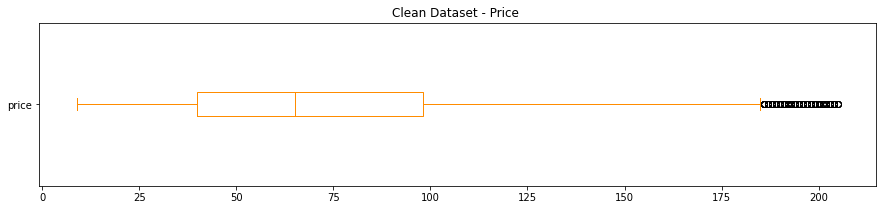

Original size: (15679, 15)
Clean size: (12086, 15)


In [ ]:
#checking the clean set
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False, color='darkorange')
ax.set_title('Clean Dataset - Price ')
plt.show()
print('Original size:', df.shape)
print('Clean size:', df_clean.shape)

Boxplot for **`minimum_nights`** **(clean)**



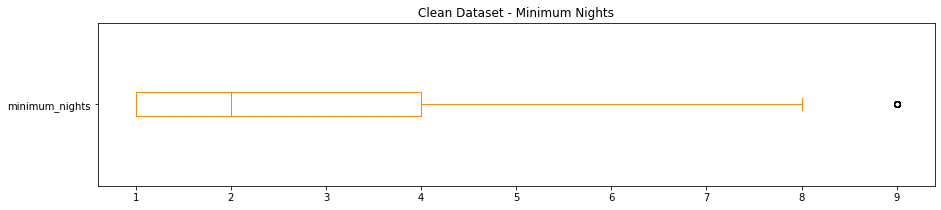

Original dataset size: (15679, 15)
Clean dataset size: (12086, 15)


In [ ]:
#checking the clean set
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False, color='darkorange')
ax.set_title('Clean Dataset - Minimum Nights')
plt.show()
print('Original dataset size:', df.shape)
print('Clean dataset size:', df_clean.shape)

####**3.4 - Cleaning Results**

The  new boxplots above show some data as outliers, however, these are being calculated against the clean dataset and took into account the boundaries previously set by the IQR model. 

To make sure that we are not dealing with outliers that will harm our analysis, let's check the **histograms** again.


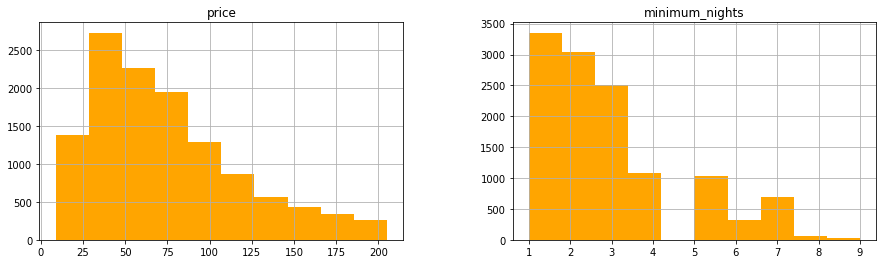

In [ ]:
#check the histograms
df_clean[['price', 'minimum_nights']].hist(figsize=(15,4), color='orange');

With the sample space reduced by the absence of outliers, the histogram shows better distributed data for our variables of interest. 

Let's check again the data statistical distribution table:

In [ ]:
# verifying the statistical distribuition of clean data
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.208600e+04,12086.0,12086.0,12086.0,12086.0,12086.0,12086.0,12086.0,12086.0,12086.0
mean,7.515074e+16,109403016.0,52.5,13.4,73.6,2.8,31.7,3.1,77.7,8.1
std,2.140120e+17,128781361.8,0.0,0.1,43.5,1.8,70.5,8.2,122.9,20.6
min,9.991000e+03,10966.0,52.4,13.1,9.0,1.0,0.0,1.0,0.0,0.0
25%,1.346899e+07,14587822.0,52.5,13.4,40.0,1.0,1.0,1.0,0.0,0.0
50%,2.617518e+07,48559459.5,52.5,13.4,65.0,2.0,6.0,1.0,0.0,0.0
75%,4.280789e+07,162369975.5,52.5,13.4,98.0,4.0,26.0,2.0,121.0,8.0
max,7.861719e+17,491924666.0,52.7,13.7,205.0,9.0,1635.0,77.0,365.0,792.0


Now we can get a much better idea of the distribution of our data. Some highlights:

-Now we have a **solid dataset**, free of negative interferences considering our analytic purposal.

-The **median** of the price variable was very little affected by outlier cleaning, showing once again the robustness of this attribute as a solution to missing data.

-The **mean** of the price variable has been drastically reduced, emphasizing the sensitivity of this attribute with respect to outliers.

###**4. Insights - Airbnb Berlin**

### **4.1- Variable Correlation**

One way to investigate the correlation between attributes is to construct a **correlation matrix**

 The correlation matrix is based on the **Pearson correlation** coefficient. It takes 1.0 as a value of perfect positive correlation and -1.0 as a perfect negative correlation.

Correlation **matrix**:

In [ ]:
# create a correlation matrix
corr = df_clean[['price', 'minimum_nights','calculated_host_listings_count', 'availability_365']].corr()

# show the correlation matrix
display(corr)

,price,minimum_nights,calculated_host_listings_count,availability_365
price,1.000000,0.028867,0.197150,0.373463
minimum_nights,0.028867,1.000000,-0.154457,-0.170062
calculated_host_listings_count,0.197150,-0.154457,1.000000,0.368574
availability_365,0.373463,-0.170062,0.368574,1.000000


Correlation **heatmap**:

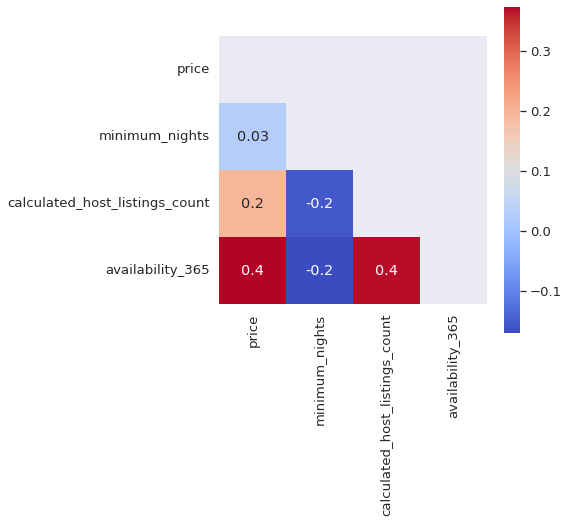

In [ ]:
# hide duplicated correlations
mask = np.triu(np.ones_like(corr, dtype=bool))

# display the heatmap from correlations
plt.figure(figsize=(6, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(corr, cmap='coolwarm', square=True, annot=True, fmt='.1g',mask=mask);


 As seen, the variables analyzed have **low correlation**. Despite variables `price` and `calculated_host_listings_count` presents a positive correlation with `availability_365`, the value of **0.4** is still low.


###**4.2 - Room Type**

What is the most listed room type in Berlin?

In [ ]:
# show the quantity of each type of property available
print(df_clean.room_type.value_counts())

Entire home/apt    6604
Private room       5201
Shared room         173
Hotel room          108
Name: room_type, dtype: int64


In [ ]:
# show the percentage of each type of property available
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    54.641734
Private room       43.033262
Shared room         1.431408
Hotel room          0.893596
Name: room_type, dtype: float64

The most listed room type in Berlin is "Entire home/apt" followed by "Private Room", as seen in the chart below:


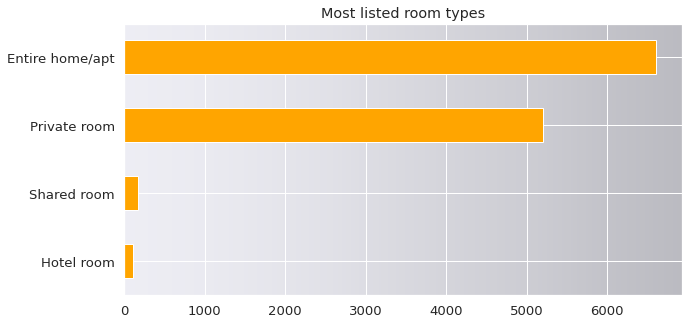

In [ ]:
#set up the gradient
gradient = np.linspace(0, 1, 1000)
gradient = np.vstack((gradient, gradient))
#establish the plot area
fig, ax = plt.subplots(figsize=(10,5))
#mapping the chart background color
ax.imshow(gradient, aspect='auto', cmap=mpl.cm.Greys, extent=(0, 1, 0, 1), alpha=0.2, transform=ax.transAxes)

#set up the chart
df_clean.room_type.value_counts().sort_values(ascending=True).plot(kind='barh', color='orange')
ax.set_title('Most listed room types')

plt.show()


### **4.3 - Average Rental Price**

What is the average rental price for a night in Berlin?

In [ ]:
# check the average value for 'price'
avg = df_clean.price.mean().round()
print(avg)

74.0


The **average rental price** for a night in Berlin is **€74**.

### **4.4 - Top Host**

Which host has the highest number of listings on the platform?

In [ ]:
# verify the top ten hosts by id
df_clean['host_id'].value_counts().sort_values(ascending=False)[:10]

418270816    77
8250486      49
378071271    37
454962512    32
177712632    26
304345361    19
372068633    17
240204649    16
372194954    16
190957759    14
Name: host_id, dtype: int64

The **top host** is registered as **418270816** (id number), accumulating a total of **77 listings**.

*Obs: Different users can be registered with the same `host_name` and lead to incorrect interpretations. This is why we are searching using the `host_id` variable.*

Let's discover more from our top host:

In [ ]:
# checking the top host's listings in the dataset
df_clean.loc[df['host_id'] == 418270816]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
14662,685218557991874792,Berlin Chausseestr | One-Bedroom Suite,418270816,Limehome,Mitte,Alexanderplatz,52.537746,13.373278,Entire home/apt,159,1,0,77,316,0
14665,685220462559922676,Berlin Chausseestr | Suite + Sofa Bed + Balcony,418270816,Limehome,Mitte,Alexanderplatz,52.537746,13.373278,Entire home/apt,137,1,1,77,363,1
14668,685222233587748409,Berlin Chausseestr | Suite + Balcony (LT),418270816,Limehome,Mitte,Alexanderplatz,52.537746,13.373278,Entire home/apt,137,1,0,77,363,0
14670,685224054858608898,Berlin Chausseestr | Suite + Sofa Bed,418270816,Limehome,Mitte,Alexanderplatz,52.537746,13.373278,Entire home/apt,129,1,2,77,360,2
14672,685225880830164394,Berlin Chausseestr | Two-Bedroom Suite,418270816,Limehome,Mitte,Alexanderplatz,52.537746,13.373278,Entire home/apt,173,1,0,77,216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15250,731812301050933853,limehome Berlin Luise-Henriette-Str. | Suite (LT),418270816,Limehome,Tempelhof - Schöneberg,Tempelhof,52.464195,13.384416,Entire home/apt,76,1,0,77,363,0
15251,731814415936337787,limehome Berlin Luise-Henriette-Str. | 1-BR Suite,418270816,Limehome,Tempelhof - Schöneberg,Tempelhof,52.464195,13.384416,Entire home/apt,102,1,1,77,327,1
15253,731816714179145445,limehome Berlin | Economy Single Suite,418270816,Limehome,Tempelhof - Schöneberg,Tempelhof,52.464195,13.384416,Entire home/apt,62,1,2,77,352,2
15254,731822500093753325,limehome Berlin Luise-Henriette-Str|ComfortSui...,418270816,Limehome,Tempelhof - Schöneberg,Tempelhof,52.464195,13.384416,Entire home/apt,85,1,0,77,364,0


Looking at the table above, we discovered that the top host is named **Limehome**. It offers many rooms at different neighborhoods, a diversity of `price` and a `minimum_nights` starting at 1.

Let's search in the original dataset (prior to cleaning) to see if exists another top host in Berlin.


In [ ]:
#checking the max listings count for a unique host
df['calculated_host_listings_count'].max()

103

Yes, in fact there is a superior **top host** with **103 listings**. Let's find out its name and the possible reason it was cut and not included in the clean dataframe.

In [ ]:
#check the top host's listings in the dataset
df.loc[df['calculated_host_listings_count'] == 103]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
13567,54025960,"Charlottenburg 1BR w/ Gym, nr Kurfürstendamm",434485440,Blueground,Charlottenburg-Wilm.,Kurfürstendamm,52.500575,13.329638,Entire home/apt,143,90,0,103,51,0
13571,54025990,"Charlottenburg Studio w/ Gym, nr Kurfürstendamm",434485440,Blueground,Charlottenburg-Wilm.,Kurfürstendamm,52.500575,13.329638,Entire home/apt,132,90,0,103,141,0
13573,54026053,"Charlottenburg Studio w/ Gym, nr Kurfürstendamm",434485440,Blueground,Charlottenburg-Wilm.,Kurfürstendamm,52.500575,13.329638,Entire home/apt,120,90,0,103,110,0
13574,54026099,"Charlottenburg Studio w/ Gym, nr Kurfürstendamm",434485440,Blueground,Charlottenburg-Wilm.,Kurfürstendamm,52.500575,13.329638,Entire home/apt,96,90,0,103,320,0
13764,563586129185624593,Charlottenburg 1BR nr KaDeWe & Kurfürstendamm,434485440,Blueground,Charlottenburg-Wilm.,Düsseldorfer Straße,52.497317,13.332222,Entire home/apt,104,90,0,103,258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15574,772344916244177478,Mitte 1br nr Spree,434485440,Blueground,Mitte,Moabit West,52.525117,13.332493,Entire home/apt,109,90,0,103,268,0
15649,775110919883271295,Charlottenburg 2br nr Kurfürstendamm,434485440,Blueground,Charlottenburg-Wilm.,Grunewald,52.482828,13.290472,Entire home/apt,85,90,0,103,365,0
15685,776534801896521958,Friedrichshain 2br at Boxhagener Platz,434485440,Blueground,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.513690,13.456341,Entire home/apt,101,90,0,103,365,0
15697,781637919195072505,Mitte 2br nr Spree,434485440,Blueground,Mitte,Moabit West,52.525117,13.332493,Entire home/apt,88,90,0,103,365,0


The **top host** in Berlin is registered as **Blueground** (host name), and it was considered an outlier because it rentals only for a **90 minimum nights stay**. Much superior of the 9.5 nights max limit estabilished.

### **4.5 - Rental Pricing**

Which are the most expensive and the cheapest locations in the dataset?

First let's build a list to discover the average rental price per neighborhood.

In [ ]:
#check average rental prices by neighbourhood
print("\n \033[1m The most expensive locations:\033[0m")
gbh = df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:8]
print(gbh)
print("\n \033[1m The cheapest locations:\033[0m")
gbl = df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=True)[:8]
print(gbl)


  The most expensive locations:
neighbourhood_group
Charlottenburg-Wilm.        80.799559
Pankow                      79.270557
Mitte                       78.902743
Treptow - Köpenick          74.294258
Tempelhof - Schöneberg      73.676399
Steglitz - Zehlendorf       72.620818
Friedrichshain-Kreuzberg    72.615196
Spandau                     71.291667
Name: price, dtype: float64

  The cheapest locations:
neighbourhood_group
Neukölln                    62.190768
Reinickendorf               62.264865
Lichtenberg                 63.630208
Marzahn - Hellersdorf       69.385542
Spandau                     71.291667
Friedrichshain-Kreuzberg    72.615196
Steglitz - Zehlendorf       72.620818
Tempelhof - Schöneberg      73.676399
Name: price, dtype: float64


**Visualizing neighbourhood rental pricing on a violin plot:**.

The violin plot showcases the listings density and price distribution by neighbourhood.

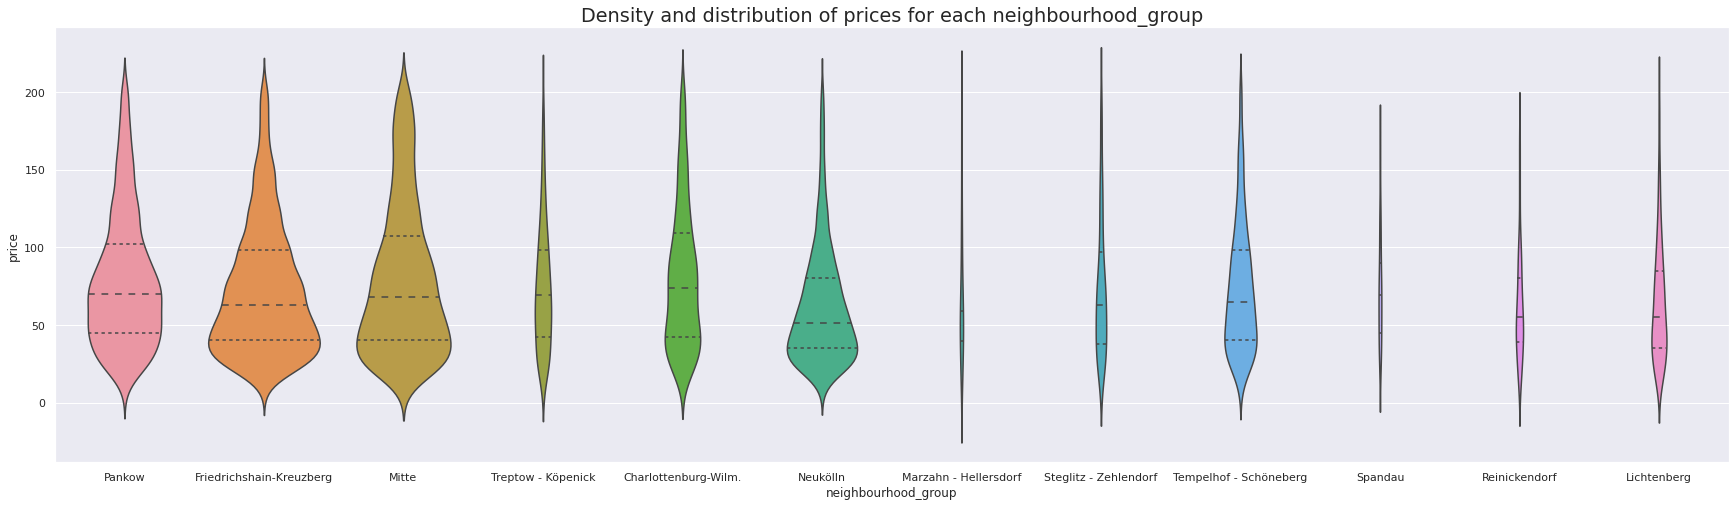

In [ ]:
# define the figure size
sns.set(rc={'figure.figsize':(30,8)})

##using violinplot to display density and distribution of prices
viz = sns.violinplot(data = df_clean, x = 'neighbourhood_group', y = 'price', width = 0.8, inner='quartiles', scale='count', vert=True);
sns.set(font_scale=1.6)
viz.set_title('Density and distribution of prices for each neighbourhood_group');

Cool, now we have a clearer picture of the profile of listings in Berlin's neighborhoods.

The width of each violin is scaled by the number of observations for it compared to the others. The **dotted lines** represent the **IQR quartiles** we estabilished earlier. 

Notice that the **most expensive locations** are positively correlated to the most dense areas. The most effervescent places and popular tourist destinations like **Charlottenburg-Wilmersdorf** and **Mitte**, stand out over the others. 

Prices can also be higher in some quiet and peaceful locations, far from the city center and usually surrounded by natural beauty, like in Müggelheim (Treptow - Köpenick).

The **cheapest locations** are on the outskirts of Berlin, both east and west, like in **Marzahn - Hellersdorf** and **Steglitz - Zehlendorf**. 


###**5 -Mapping Berlin Airbnb Listings**

A georeferenced scatter plot of the Berlin listings broken down by price.

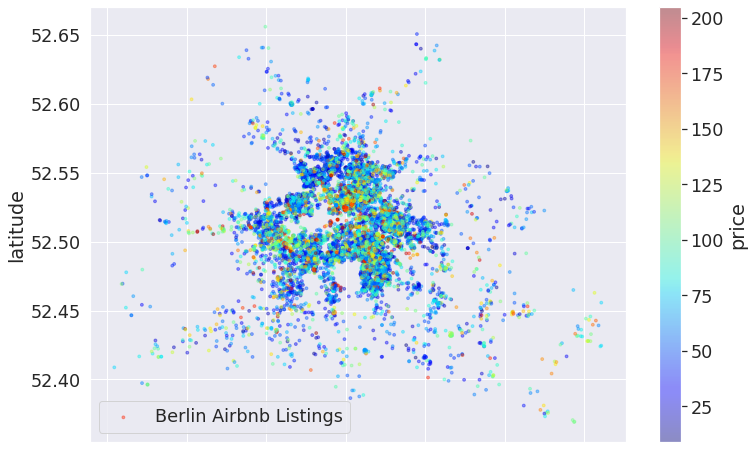

In [ ]:
# display a scatter plot
df_clean.plot(kind='scatter', x='longitude', y='latitude', label='Berlin Airbnb Listings', alpha=0.4, s=8, c='price', cmap=plt.get_cmap('jet'), figsize=(12,8));
plt.show()

#**Conclusions**


This project allowed us to compile statistics and information about the Airbnb profile in Berlin from raw data, giving us a big picture view of it. 

Getting to know these nuances closely brings a series of advantages. For example, allowing us to make better decisions when building smart cities.

From the data we can build a substrate that can become the foundation of many public policies.

In this regard, it is worth mentioning that Berlin is one of the most expensive cities for rental housing in Europe, with a 40% increase in prices for one-bedroom apartments.

The lack of available and accessible housing has led to a housing crisis. Some eople are revamping existing properties and protecting the housing stock from being used for the tourist rental market.

This study showed that rental companies like Blueground and Limehome take considerable advantage of the Airbnb service as well, figuring as top hosts.

Previously, we saw that in Berlin, specific rentals require specific licenses. It is one way for the government to regulate and protect the residential function of properties but a percentage of 59.4% of the listings in Berlin are missing data about license. 

It means, at least, that there is a shadow hanging over these accommodations that needs to be clarified.

Overall, through questions and answers, we obtained some interesting insights and explained each step of the process 

Note that this work is just an initial exploratory approach. It should be remembered that this dataset is a summarized version. The complete version of the dataset with 106 attributes is available at Inside Airbnb website, to meet more complex analyses. 



